In [1]:
# Cell 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
from PIL import Image

print("✅ Imports OK")

✅ Imports OK


In [2]:
# Cell 2: Count images
print("=" * 70)
print("📊 DATASET STATISTICS")
print("=" * 70)

data_dir = Path('data/raw')

# COVID-19
covid_base = data_dir / 'covid19-pneumonia' / 'Data'
covid_total = 0

print("\n🦠 COVID-19:")
for split in ['test', 'train']:
    path = covid_base / split
    if path.exists():
        print(f"\n  {split}:")
        for cls in ['COVID19', 'NORMAL', 'PNEUMONIA']:
            cls_path = path / cls
            if cls_path.exists():
                imgs = list(cls_path.glob('*.jpg')) + list(cls_path.glob('*.png')) + list(cls_path.glob('*.jpeg'))
                n = len(imgs)
                covid_total += n
                print(f"    {cls:15s}: {n:5d}")

print(f"\n  Total: {covid_total:,}")

# Tuberculosis
tb_path = data_dir / 'tuberculosis' / 'TB_Chest_Radiography_Database'
tb_total = 0

print("\n🫁 Tuberculosis:")
for cls in ['Normal', 'Tuberculosis']:
    cls_path = tb_path / cls
    if cls_path.exists():
        imgs = list(cls_path.glob('*.jpg')) + list(cls_path.glob('*.png')) + list(cls_path.glob('*.jpeg'))
        n = len(imgs)
        tb_total += n
        print(f"  {cls:15s}: {n:5d}")

print(f"\n  Total: {tb_total:,}")

# Pneumonia
pn_path = data_dir / 'pneumonia' / 'chest_xray'
pn_total = 0

print("\n🤒 Pneumonia:")
for split in ['train', 'test', 'val']:
    path = pn_path / split
    if path.exists():
        print(f"\n  {split}:")
        for cls in ['NORMAL', 'PNEUMONIA']:
            cls_path = path / cls
            if cls_path.exists():
                imgs = list(cls_path.glob('*.jpg')) + list(cls_path.glob('*.png')) + list(cls_path.glob('*.jpeg'))
                n = len(imgs)
                pn_total += n
                print(f"    {cls:15s}: {n:5d}")

print(f"\n  Total: {pn_total:,}")

grand_total = covid_total + tb_total + pn_total
print("\n" + "=" * 70)
print(f"🎯 GRAND TOTAL: {grand_total:,}")
print("=" * 70)

📊 DATASET STATISTICS

🦠 COVID-19:

  test:
    COVID19        :   116
    NORMAL         :   317
    PNEUMONIA      :   855

  train:
    COVID19        :   460
    NORMAL         :  1266
    PNEUMONIA      :  3418

  Total: 6,432

🫁 Tuberculosis:
  Normal         :  3500
  Tuberculosis   :   700

  Total: 4,200

🤒 Pneumonia:

  train:
    NORMAL         :  1341
    PNEUMONIA      :  3875

  test:
    NORMAL         :   234
    PNEUMONIA      :   390

  val:
    NORMAL         :     8
    PNEUMONIA      :     8

  Total: 5,856

🎯 GRAND TOTAL: 16,488


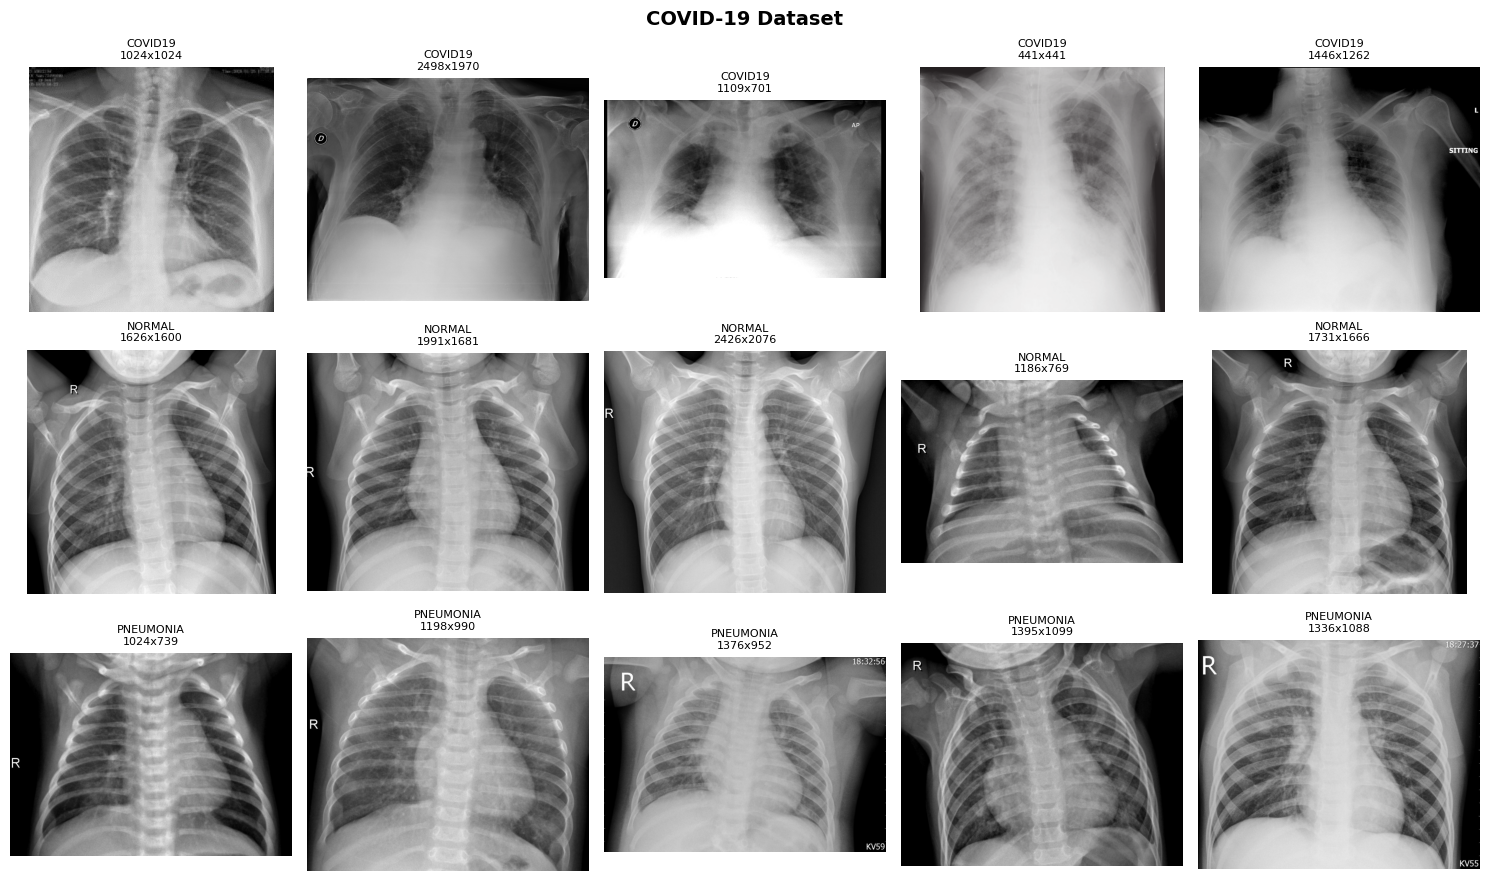

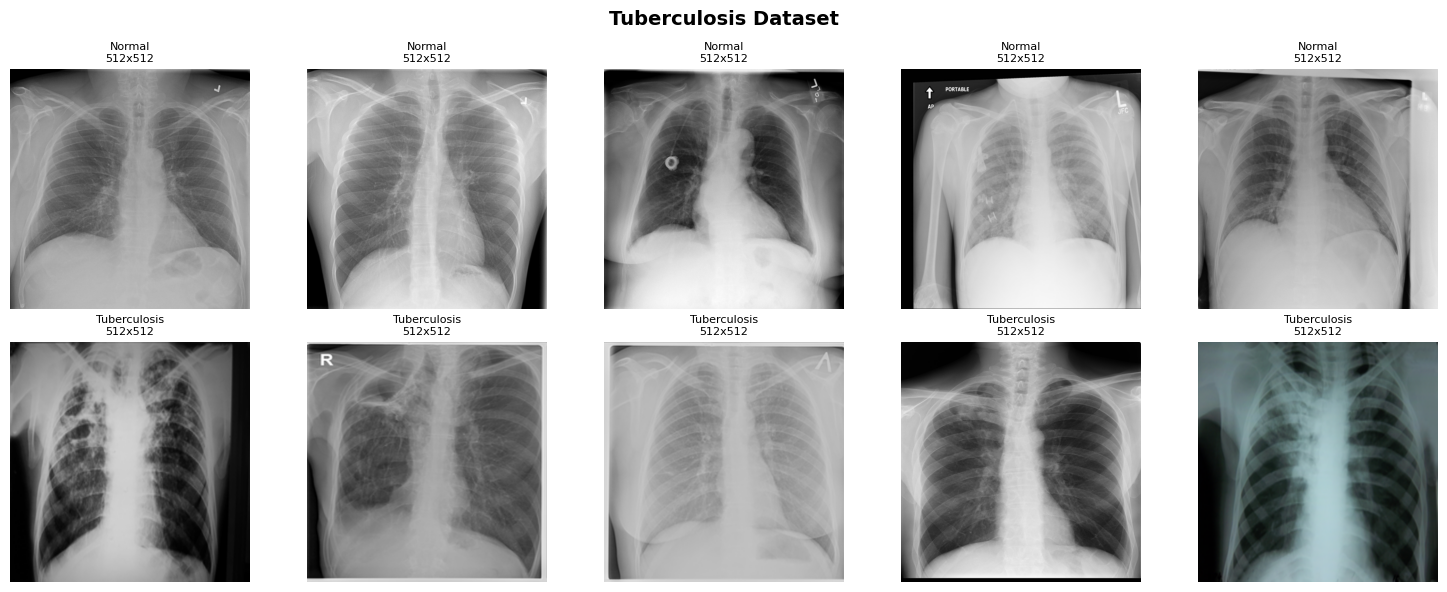

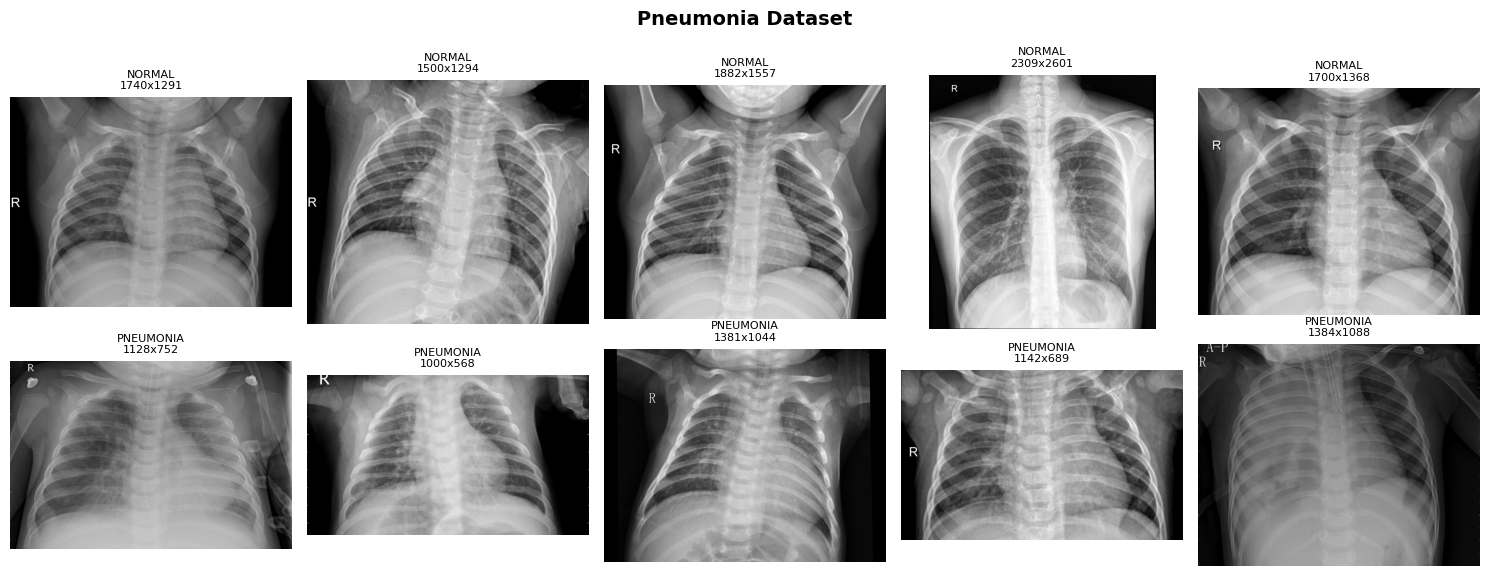

In [3]:
# Cell 3: Visualize samples
def show_samples(paths, classes, title, n=5):
    fig, axes = plt.subplots(len(classes), n, figsize=(15, 3*len(classes)))
    if len(classes) == 1:
        axes = axes.reshape(1, -1)
    
    for i, cls in enumerate(classes):
        all_imgs = []
        if isinstance(paths, list):
            for p in paths:
                cp = p / cls
                if cp.exists():
                    all_imgs.extend(list(cp.glob('*.jpg')) + list(cp.glob('*.png')) + list(cp.glob('*.jpeg')))
        else:
            cp = paths / cls
            if cp.exists():
                all_imgs = list(cp.glob('*.jpg')) + list(cp.glob('*.png')) + list(cp.glob('*.jpeg'))
        
        if all_imgs:
            samples = np.random.choice(all_imgs, min(n, len(all_imgs)), replace=False)
            for j, img_path in enumerate(samples):
                img = Image.open(img_path).convert('RGB')
                axes[i, j].imshow(img)
                axes[i, j].set_title(f"{cls}\n{img.size[0]}x{img.size[1]}", fontsize=8)
                axes[i, j].axis('off')
    
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# COVID-19 samples
show_samples([covid_base/'test', covid_base/'train'], ['COVID19', 'NORMAL', 'PNEUMONIA'], 'COVID-19 Dataset')

# TB samples
show_samples(tb_path, ['Normal', 'Tuberculosis'], 'Tuberculosis Dataset')

# Pneumonia samples
show_samples(pn_path/'train', ['NORMAL', 'PNEUMONIA'], 'Pneumonia Dataset')

In [4]:
# Cell 4: Image size analysis
def analyze_size(paths, classes, name, n=100):
    print(f"\n{name}:")
    sizes, modes = [], []
    
    for cls in classes:
        all_imgs = []
        if isinstance(paths, list):
            for p in paths:
                cp = p / cls
                if cp.exists():
                    all_imgs.extend(list(cp.glob('*.jpg')) + list(cp.glob('*.png')) + list(cp.glob('*.jpeg')))
        else:
            cp = paths / cls
            if cp.exists():
                all_imgs = list(cp.glob('*.jpg')) + list(cp.glob('*.png')) + list(cp.glob('*.jpeg'))
        
        sample = np.random.choice(all_imgs, min(n, len(all_imgs)), replace=False) if all_imgs else []
        for img_path in sample:
            try:
                img = Image.open(img_path)
                sizes.append(img.size)
                modes.append(img.mode)
            except:
                pass
    
    if sizes:
        w = [s[0] for s in sizes]
        h = [s[1] for s in sizes]
        print(f"  Size (WxH): {min(w)}x{min(h)} to {max(w)}x{max(h)}, avg {int(np.mean(w))}x{int(np.mean(h))}")
        print(f"  Modes: {Counter(modes)}")

analyze_size([covid_base/'test', covid_base/'train'], ['COVID19', 'NORMAL', 'PNEUMONIA'], 'COVID-19')
analyze_size(tb_path, ['Normal', 'Tuberculosis'], 'Tuberculosis')
analyze_size([pn_path/s for s in ['train','test','val']], ['NORMAL', 'PNEUMONIA'], 'Pneumonia')


COVID-19:
  Size (WxH): 224x178 to 5623x4757, avg 1473x1188
  Modes: Counter({'RGB': 266, 'L': 26, 'RGBA': 8})

Tuberculosis:
  Size (WxH): 512x512 to 512x512, avg 512x512
  Modes: Counter({'RGB': 159, 'L': 41})

Pneumonia:
  Size (WxH): 514x275 to 2721x2578, avg 1458x1113
  Modes: Counter({'L': 198, 'RGB': 2})



     Dataset  Images Percentage
    COVID-19    6432      39.0%
Tuberculosis    4200      25.5%
   Pneumonia    5856      35.5%
       TOTAL   16488       0.6%


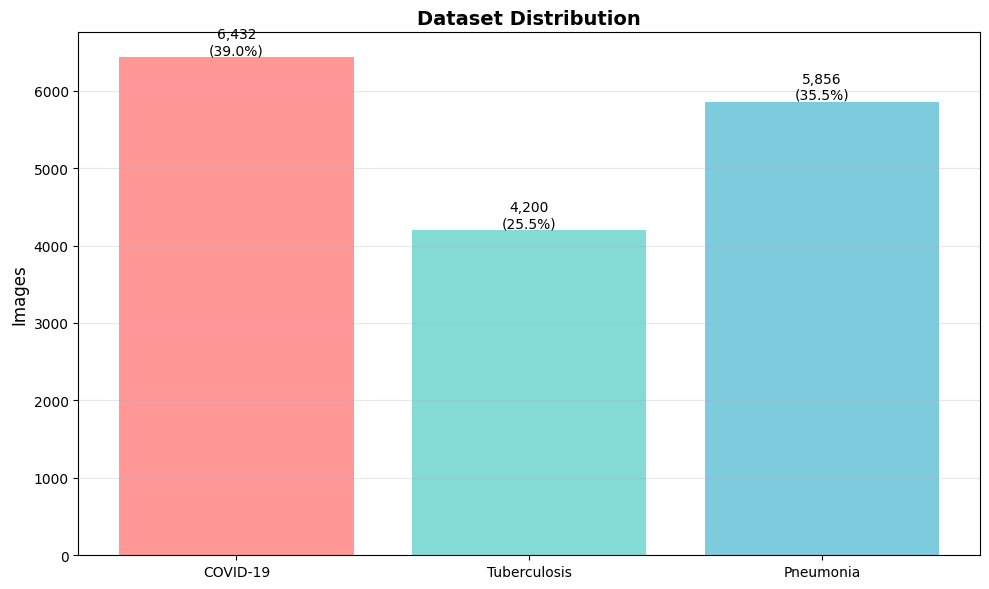


✅ EDA Complete!

💡 Key findings:
  - Total: 16,488 images
  - Image sizes vary → resize to 512x512
  - Mix of RGB/grayscale → convert to RGB
  - Ready for preprocessing!


In [5]:
# Cell 5: Summary
summary = pd.DataFrame({
    'Dataset': ['COVID-19', 'Tuberculosis', 'Pneumonia', 'TOTAL'],
    'Images': [covid_total, tb_total, pn_total, grand_total],
    'Percentage': [f"{x/grand_total*100:.1f}%" for x in [covid_total, tb_total, pn_total, 100]]
})

print("\n" + "=" * 70)
print(summary.to_string(index=False))
print("=" * 70)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(['COVID-19', 'Tuberculosis', 'Pneumonia'], 
              [covid_total, tb_total, pn_total],
              color=['#ff6b6b', '#4ecdc4', '#45b7d1'], alpha=0.7)

ax.set_ylabel('Images', fontsize=12)
ax.set_title('Dataset Distribution', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, [covid_total, tb_total, pn_total]):
    h = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2, h, f'{count:,}\n({count/grand_total*100:.1f}%)',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n✅ EDA Complete!")
print(f"\n💡 Key findings:")
print(f"  - Total: {grand_total:,} images")
print(f"  - Image sizes vary → resize to 512x512")
print(f"  - Mix of RGB/grayscale → convert to RGB")
print(f"  - Ready for preprocessing!")